In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


## **Load the Data**

Load the data and print information about the data, summary statistics, and the first few rows.

In [2]:
healthcare_file_path = "/kaggle/input/healthcare-dataset/healthcare_dataset.csv"

# read in csv file with pandas
health_data = pd.read_csv(healthcare_file_path)

In [3]:
# print information about the dataframe
health_data.info()

# change column names to snake case
health_data.columns = (health_data.columns.str.replace(' ','_').str.lower())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
# print the top few rows of the dataframe
health_data.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# check if any columns have missing values
for col in health_data.columns:
    if health_data[col].isnull().any():
        print(str(col) + " has missing values")
    else:
        print(str(col) + " is good")

name is good
age is good
gender is good
blood_type is good
medical_condition is good
date_of_admission is good
doctor is good
hospital is good
insurance_provider is good
billing_amount is good
room_number is good
admission_type is good
discharge_date is good
medication is good
test_results is good


## **Add a column for number of days admitted to the hospital**

 Use the date of admission and date of discharge to determine the total number of days the patient was in the hospital.

In [6]:
# convert 'date_of_admission' and 'discharge_date' columns to datetime
dt_cols = ['date_of_admission','discharge_date']

for col in dt_cols:
    health_data[col] = pd.to_datetime(health_data[col], errors='coerce')

# subtract 'date_of_admission' from 'discharge_date' to get total number of admission days
health_data['length_of_admission'] = (health_data['discharge_date'] - health_data['date_of_admission']).dt.days

In [7]:
# print summary statistics for numerical data
health_data.describe()

,age,date_of_admission,billing_amount,room_number,discharge_date,length_of_admission
count,55500.000000,55500,55500.000000,55500.000000,55500,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504,15.509009
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00,8.000000
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,30.000000
std,19.602454,NaN,14211.454431,115.243069,NaN,8.659600


In [8]:
# get list of categorical variables
s = (health_data.dtypes == 'object')
object_cols = list(s[s].index)
print('\nCategorical Columns:')
print(object_cols)

# check number of values for one-hot encoding categorical variables 
print('\nNumber of unique values for categorical data:')
print('Hospitals: ' + str(health_data['hospital'].nunique()))
print('Medical Conditions: ' + str(health_data['medical_condition'].nunique()))
print('Insurance Providers: ' + str(health_data['insurance_provider'].nunique()))
print('Medications: ' + str(health_data['medication'].nunique()))
print('Blood Types: ' + str(health_data['blood_type'].nunique()))
print('Admission Types: ' + str(health_data['admission_type'].nunique()))
print('Test Results: ' + str(health_data['test_results'].nunique()))
print('Gender: ' + str(health_data['gender'].nunique()))


Categorical Columns:
['name', 'gender', 'blood_type', 'medical_condition', 'doctor', 'hospital', 'insurance_provider', 'admission_type', 'medication', 'test_results']

Number of unique values for categorical data:
Hospitals: 39876
Medical Conditions: 6
Insurance Providers: 5
Medications: 5
Blood Types: 8
Admission Types: 3
Test Results: 3
Gender: 2


In [9]:
# set the target and predictor columns
y = health_data.length_of_admission
features = ['age','gender','blood_type','medical_condition','insurance_provider','admission_type','medication','test_results']
X = health_data[features]

## **Subset data for testing, training and validation**
One-hot encode categorical columns, then split data into the following:

30% testing

70% training (56% training, 14% validation)

In [10]:
from sklearn.model_selection import train_test_split

# split into testing (30%) and training (70%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=0)

# divide dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size = 0.8, test_size = 0.2, random_state = 0)

## **Determine random forest model**
Check MAE for a few different random forest models to determine which is best. Set up a pipeline with sklearn to handle one-hot encoding and downstream plotting of categorical variables.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

# define preprocessing
t = (X.dtypes == 'object')
X_object_cols = list(t[t].index)
numerical_features = ['age']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), X_object_cols),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough'
)

# define models
models = {
    'model_1': RandomForestRegressor(n_estimators=50, random_state=0),
    'model_2': RandomForestRegressor(n_estimators=100, random_state=0),
    'model_3': RandomForestRegressor(n_estimators=150, random_state=0),
    'model_4': RandomForestRegressor(n_estimators=150, min_samples_split=10, random_state=0),
    'model_5': RandomForestRegressor(n_estimators=150 ,min_samples_split=10, max_depth=5, random_state=0)
}

# model evaluation using MAE
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    
    results[name] = {
        'pipeline': pipeline,
        'mae': mae
    }
    print(f"{name} MAE: {mae:.4f}")

model_1 MAE: 7.5003
model_2 MAE: 7.4609
model_3 MAE: 7.4531
model_4 MAE: 7.4735
model_5 MAE: 7.5173


## **Permutation Feature Importance**

Model 3 performed the best according to the MAE. Create a new pipeline for one-hot encoding and training with model 3. Then check each feature to determine the contribution of the feature in the model's performance.

In [12]:
from sklearn.inspection import permutation_importance

# build the pipeline using the preprocessor from earlier for one-hot encoding
pipeline2 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(n_estimators=150, random_state=0))
])

# fit on non-encoded data
pipeline2.fit(X_train, y_train)

# permutation importance using validation set
result = permutation_importance(pipeline2, X_val, y_val, n_repeats=10, random_state=0)

# get feature names after preprocessing
raw_feature_names = X_val.columns

# display importance scores by non-encoded column name
importance_df = pd.DataFrame({
    'feature': raw_feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(importance_df)

              feature  importance_mean  importance_std
2          blood_type         0.038703        0.007245
0                 age         0.037936        0.006003
4  insurance_provider         0.035264        0.004470
3   medical_condition         0.031212        0.002653
6          medication         0.028131        0.003203
7        test_results         0.021723        0.002898
5      admission_type         0.019280        0.003713
1              gender         0.016394        0.003151


## **Plots**


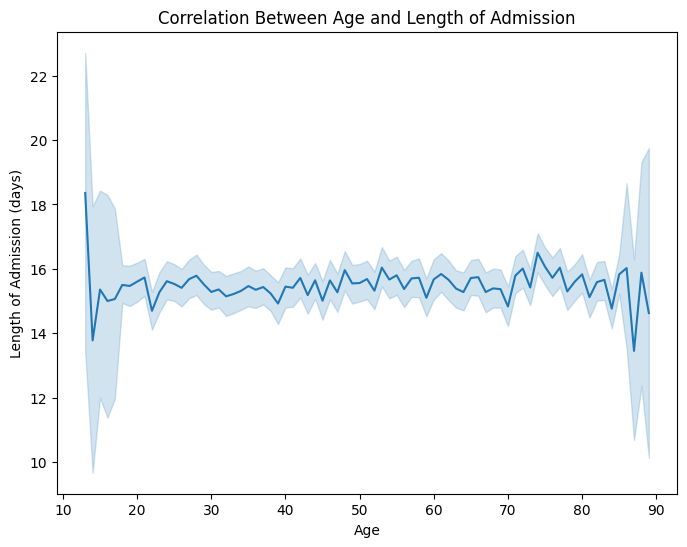

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress specific warning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# create scatter plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='length_of_admission', data=health_data)

# add labels and title
plt.xlabel('Age')
plt.ylabel('Length of Admission (days)')
plt.title('Correlation Between Age and Length of Admission')

# Show plot
plt.show()

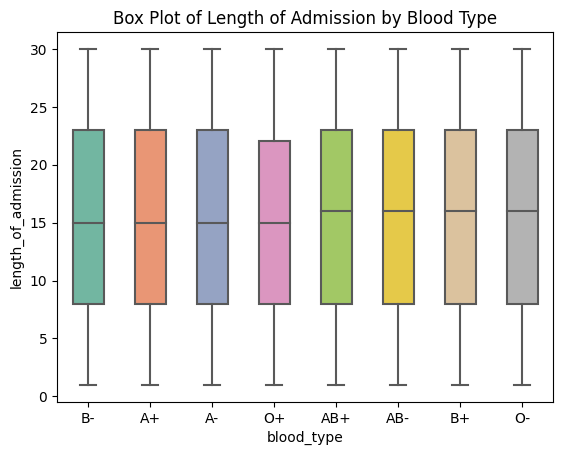

In [14]:
# create a boxplot for length of admission by blood type
sns.boxplot(x='blood_type', y='length_of_admission', data=health_data, palette='Set2', width=0.5, dodge=False)
plt.title('Box Plot of Length of Admission by Blood Type')
plt.show()

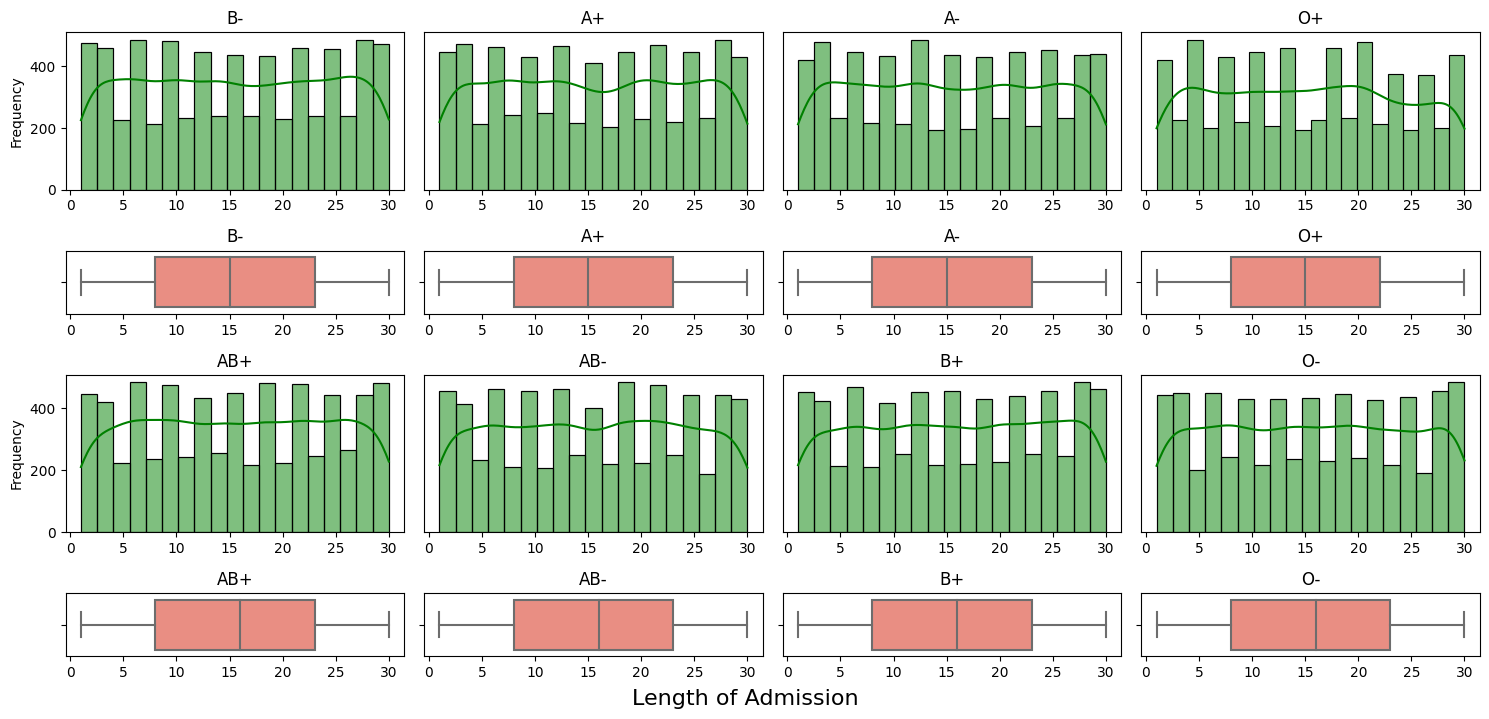

In [15]:
from matplotlib.gridspec import GridSpec

# set up figure size
fig_width = 15
fig_height = 7 

# get number of unique blood types
num_categories = 8
blood_types = health_data['blood_type'].unique()[:num_categories]

# set up grid layout (4 rows, 4 columns)
cols = 4  
rows = 4

# set up grid ratios
fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=rows, ncols=cols, height_ratios=[0.5, 0.2, 0.5, 0.2])

# create the histograms in the 1st and 3rd rows
for i, blood_type in enumerate(blood_types):
    if i < 4:
        row_idx_hist = 0 
        row_idx_box = 1
    else:
        row_idx_hist = 2
        row_idx_box = 3
    # column index for each category (cycle back after 4 columns)
    col_idx = i % 4  

    # plot histogram in the 1st/3rd rows
    plot_hist = fig.add_subplot(gs[row_idx_hist, col_idx])
    sns.histplot(health_data[health_data['blood_type'] == blood_type]['length_of_admission'], kde=True, ax=plot_hist, color='green')
    
    # histogram title and labels
    if col_idx == 0:
        plot_hist.set_ylabel('Frequency')
        plot_hist.set_xlabel('')
    else:
        plot_hist.set_xlabel('')
        plot_hist.set_ylabel('')
        plot_hist.set_yticks([])

    plot_hist.set_title(f'{blood_type}')

    # plot boxplot in the 2nd or 4th row
    plot_box = fig.add_subplot(gs[row_idx_box, col_idx])
    sns.boxplot(x='length_of_admission', data=health_data[health_data['blood_type'] == blood_type], ax=plot_box, color='salmon')
    
    # boxplot title and labels
    if col_idx == 0:
        plot_box.set_ylabel('')  
        plot_box.set_xlabel('')
    else:
        plot_box.set_xlabel('')
        plot_box.set_ylabel('')

    plot_box.set_title(f'{blood_type}')

# "Length of Admission" label centered at the bottom
fig.text(0.5, -0.02, 'Length of Admission', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()


The "medical condition" feature had the lowest standard deviation in the feature importance table, so a plot of length of admission by medical condition is of interest. 

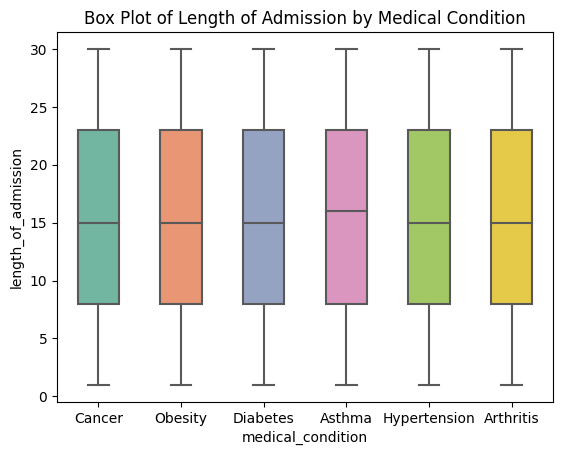

In [16]:
# create a boxplot for length of admission by medical condition
sns.boxplot(x='medical_condition', y='length_of_admission', data=health_data, palette='Set2', width=0.5, dodge=False)
plt.title('Box Plot of Length of Admission by Medical Condition')
plt.show()

Based on the results, it seems that blood type and age had the largest effect on the model predicting length of hospital admission. The effect of blood type is unexpected; I would anticipate that features like medical condition, admission type, and test results would be more relevant. One thing to note is the fact that this is simulated data. 